In [1]:
%matplotlib inline

from pylab import *
import sys
import os
from scipy.interpolate import interp1d

In [2]:
def movingaverage(interval, window_size):
    window = np.ones(int(window_size))/float(window_size)
    return np.convolve(interval, window, 'same')


In [3]:
def multiplot(dir,nameList,labelList,timeList,color1List,color2List, xlabel, ylabel,title,grid,legend,tight_layout,show,savefig,maxy=np.nan,miny=np.nan,ave=True,ws=100):
    for name, label, color1, color2, time in zip(nameList, labelList,color1List, color2List, timeList):
        fi = np.loadtxt(dir+name)
        if (os.path.isfile(dir+name+"_stat.dat")==False):
            fo = open(dir+name+"_stat.dat","w")
            fo.write("angle="+str(np.mean(fi))+"+-"+str(np.std(fi))+'\n')
            print("angle="+str(np.mean(fi))+"+-"+str(np.std(fi)))
            fo.close()
        x = np.linspace(time[0],time[1],np.size(fi[:,0]))
        x = fi[:,0]/10
        #plt.plot(x,fi[:,1],linewidth=1.5,color=color1,alpha=0.5,label=label)
        plt.plot(x[ws:0-ws],movingaverage(fi[:,1],ws)[ws:0-ws],linewidth=1.5,color=color1,alpha=0.7,label=label)
        maxy = np.nanmax([maxy, np.nanmax(fi)])
        miny = np.nanmin([miny, np.nanmin(fi)])
        #if ave: plt.plot(x[ws:0-ws],movingaverage(fi[:,1],ws)[ws:0-ws],linewidth=2.5,color=color2,label=label,alpha=0.7)
    
    plt.ylim(min(fi[:,1]),max(fi[:,1]))
    plt.xlim(min(x),max(x))
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    if grid: plt.grid()
    if legend: plt.legend(loc='upper left',bbox_to_anchor=(1.04, 1),fontsize = 12)
    if tight_layout: plt.tight_layout()
    if savefig: plt.savefig(dir+name+'.png',dpi=300)
    if show: plt.show()  

In [8]:
def multiplot2(dir,nameList,labelList,timeList,color1List,color2List, xlabel, ylabel,title,grid,legend,tight_layout,show,savefig,maxy=np.nan,miny=np.nan,ave=True,ws=100):
    for name, label, color1, color2, time in zip(nameList, labelList,color1List, color2List, timeList):
        fi = np.loadtxt(dir+name)
        if (os.path.isfile(dir+name+"_stat.dat")==False):
            fo = open(dir+name+"_stat.dat","w")
            fo.write("angle="+str(np.mean(fi))+"+-"+str(np.std(fi))+'\n')
            print("angle="+str(np.mean(fi))+"+-"+str(np.std(fi)))
            fo.close()
        #x = np.linspace(time[0],time[1],np.size(fi))
        x = fi[:,0]
        fi = fi[:,1]
        maxy = np.nanmax([maxy, np.nanmax(fi)])
        miny = np.nanmin([miny, np.nanmin(fi)])
        plt.plot(x,fi,linewidth=1.5,color=color2,label=label,alpha=0.7)
        #if ave: plt.plot(x[ws:0-ws],movingaverage(fi,ws)[ws:0-ws],linewidth=2.5,color=color2,label=label,alpha=0.7)
    
    plt.ylim(miny,maxy)
    plt.xlim(min(x),max(x))
    plt.title(title) 
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    if grid: plt.grid()
    if legend: plt.legend(loc='best', fontsize = 12 )
    if tight_layout: plt.tight_layout()
    if savefig: plt.savefig(dir+name+'.png',dpi=300)
    if show: plt.show()  

In [5]:
def workplot(dir,nameList,labelList,timeList,column,color1List,color2List, xlabel, ylabel,title,grid,legend,tight_layout,show,savefig,maxy=np.nan,miny=np.nan,ave=True,ws=100):
    for name, label, color1, color2, time in zip(nameList, labelList, color1List, color2List, timeList):
        fi = np.loadtxt(dir+name+".out")
        if (os.path.isfile(dir+name+"_stat.dat")==False):
            fo = open(dir+name+"_stat.dat","w")
            fo.write("angle="+str(np.mean(fi))+"+-"+str(np.std(fi))+'\n')
            print("angle="+str(np.mean(fi))+"+-"+str(np.std(fi)))
            fo.close()
        x = np.linspace(time[0],time[1],np.size(fi[:,0]))
        plt.plot(x,fi[:,column],color=color1,alpha=0.7)
        maxy = np.nanmax([maxy, np.nanmax(fi)])
        miny = np.nanmin([miny, np.nanmin(fi)])
        if ave: plt.plot(x[ws:0-ws],movingaverage(fi,ws)[ws:0-ws],linewidth=1.5,color=color2,label=label,alpha=0.7)
    
    #plt.ylim(miny,maxy)
    #plt.xlim(min(x),max(x))
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    if grid: plt.grid()
    if legend: plt.legend(loc='best', fontsize = 15 )
    if tight_layout: plt.tight_layout()
    if savefig: plt.savefig(dir+name+'.png',dpi=300)
    if show: plt.show()  

In [6]:
def hisplot(dir,nameList,labelList,color1List,color2List, xlabel, ylabel,title,grid,legend,tight_layout,show,savefig,maxy=np.nan,miny=np.nan,ave=True,binnum=10):
    for name, label, color1, color2, time in zip(nameList, labelList, color1List, color2List, timeList):
        fi = np.loadtxt(dir+name+".out")
        if (os.path.isfile(dir+name+"_stat.dat")==False):
            fo = open(dir
                      +name+"_stat.dat","w")
            fo.write("angle="+str(np.mean(fi))+"+-"+str(np.std(fi))+'\n')
            print("angle="+str(np.mean(fi))+"+-"+str(np.std(fi)))
            fo.close()
        n, bins, patches = plt.hist(fi,binnum,normed=1,facecolor=color1,alpha=0.75)
        if ave:
            x = (bins[0:-1]+bins[1:])/2
            f = interp1d(x,n)
            xnew = np.linspace(x[0],x[-1],binnum*5)
            plt.plot(xnew,f(xnew),color2+'--')

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    if grid: plt.grid()
    if legend: plt.legend(loc='best', fontsize = 15 )
    if tight_layout: plt.tight_layout()
    if savefig: plt.savefig(dir+name+'_hist.png',dpi=300)
    if show: plt.show()  

In [5]:
font = {'family':'sans-serif','serif':'Times','weight':'bold','size' : 16}
#plt.rc('text',usetex=True)
#plt.rc('font',family='serif')
plt.rc('font', **font)
params = {'axes.titlesize':'x-large'}
plt.rcParams.update(params)

<IPython.core.display.Javascript object>


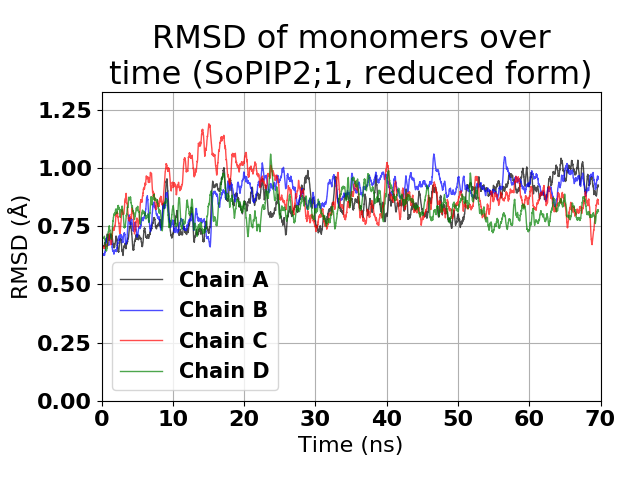

In [11]:
Mac=False
dir = "sopip/reduced/data/"
if Mac:
    dir = "/Volumes/zhiyu/scr/"+dir
else:
    dir = "/Scr/jimmydo2/"+dir

nameList = ["rmsdA.dat","rmsdB.dat","rmsdC.dat","rmsdD.dat"]
labelList= ["Chain A","Chain B","Chain C","Chain D"]
timeList= [(0,70),(0,70),(0,70),(0,70)]
color1List= ["gray","skyblue","lightsalmon","lightgreen"]#color for all data
color2List= ["black","b","r","g"]#color for average
xlabel = "Time (ns)"
ylabel = 'RMSD (Å)'
title = "RMSD of monomers over\ntime (SoPIP2;1, reduced form)"

grid = True

legend = True
tight_layout = True
show = True
savefig = True

maxy = -100
miny = 100

ws = 30

multiplot(dir,nameList,labelList,timeList,color1List,color2List,xlabel,ylabel,title,grid,legend,tight_layout,show,savefig,maxy,miny,1,ws)

<IPython.core.display.Javascript object>


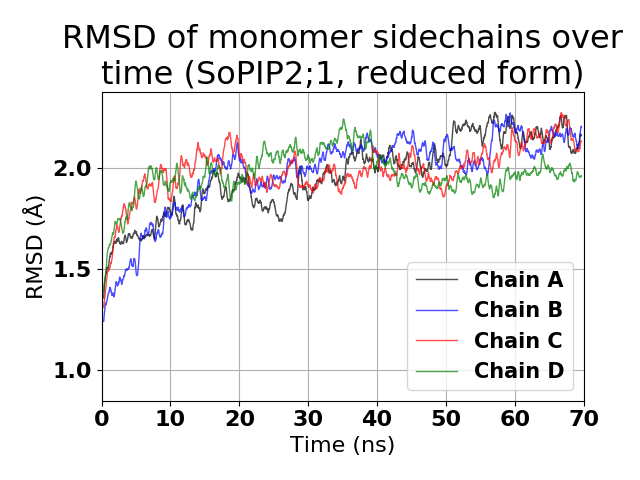

In [25]:
Mac=False
dir = "sopip/reduced/data/"
if Mac:
    dir = "/Volumes/zhiyu/scr/"+dir
else:
    dir = "/Scr/jimmydo2/"+dir

nameList = ["rmsdA-sidechain.dat","rmsdB-sidechain.dat","rmsdC-sidechain.dat","rmsdD-sidechain.dat"]
labelList= ["Chain A","Chain B","Chain C","Chain D"]
timeList= [(0,70),(0,70),(0,70),(0,70)]
color1List= ["gray","skyblue","lightsalmon","lightgreen"]#color for all data
color2List= ["black","b","r","g"]#color for average
xlabel = "Time (ns)"
ylabel = 'RMSD (Å)'
title = "RMSD of monomer sidechains over\ntime (SoPIP2;1, reduced form)"

grid = True

legend = True
tight_layout = True
show = True
savefig = True

maxy = -100
miny = 100

ws = 30

multiplot(dir,nameList,labelList,timeList,color1List,color2List,xlabel,ylabel,title,grid,legend,tight_layout,show,savefig,maxy,miny,1,ws)

<IPython.core.display.Javascript object>


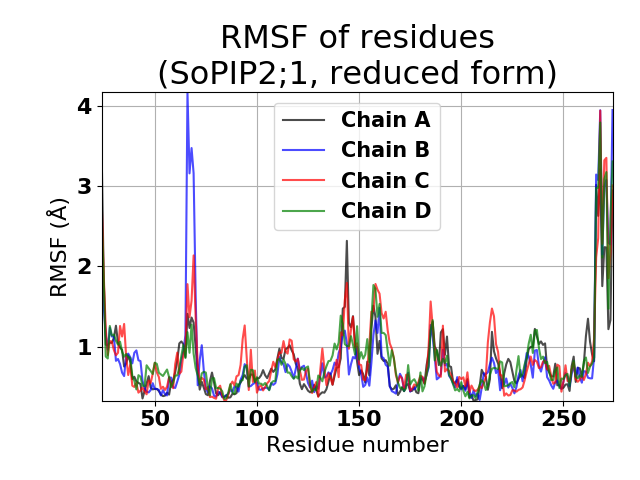

In [13]:
Mac=False
dir = "sopip/reduced/data/"
if Mac:
    dir = "/Volumes/zhiyu/scr/"+dir
else:
    dir = "/Scr/jimmydo2/"+dir

nameList = ["rmsfA.dat","rmsfB.dat","rmsfC.dat","rmsfD.dat"]
labelList= ["Chain A","Chain B","Chain C","Chain D"]
timeList= [(24,274),(24,274),(24,274),(24,274)]
color1List= ["black","b","r","g"]#color for all data
color2List= ["black","b","r","g"]#color for average
xlabel = "Residue number"
ylabel = 'RMSF (Å)'
title = "RMSF of residues\n(SoPIP2;1, reduced form)"

grid = True

legend = True
tight_layout = True
show = True
savefig = True

maxy = np.nan
miny = np.nan

ws = 100

multiplot2(dir,nameList,labelList,timeList,color1List,color2List,xlabel,ylabel,title,grid,legend,tight_layout,show,savefig,maxy,miny,0,ws)

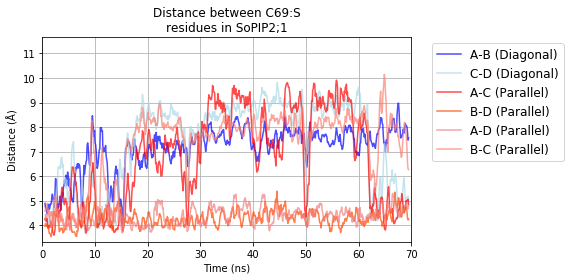

In [9]:
Mac=False
dir = "sopip/reduced/data/"
if Mac:
    dir = "/Volumes/zhiyu/scr/"+dir
else:
    dir = "/Scr/jimmydo2/"+dir

nameList = ["disulfide-AB.dat","disulfide-CD.dat","disulfide-AC.dat","disulfide-BD.dat","disulfide-AD.dat","disulfide-BC.dat"]
labelList= ["A-B (Diagonal)","C-D (Diagonal)","A-C (Parallel)","B-D (Parallel)","A-D (Parallel)","B-C (Parallel)"]
timeList= [(0,70),(0,70),(0,70),(0,70),(0,70),(0,70)]
color1List= ["b","lightblue","r","orangered","lightcoral","salmon"]#color for all data
color2List= ["b","lightblue","r","orangered","lightcoral","salmon"]#color for average
xlabel = "Time (ns)"
ylabel = "Distance (Å)"
title = "Distance between C69:S\nresidues in SoPIP2;1"

grid = True

legend = True
tight_layout = True
show = True
savefig = True

maxy = np.nan
miny = np.nan

ws = 5

multiplot(dir,nameList,labelList,timeList,color1List,color2List,xlabel,ylabel,title,grid,legend,tight_layout,show,savefig,maxy,miny,1,ws)